In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

import io

df = pd.read_csv("dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,1
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1


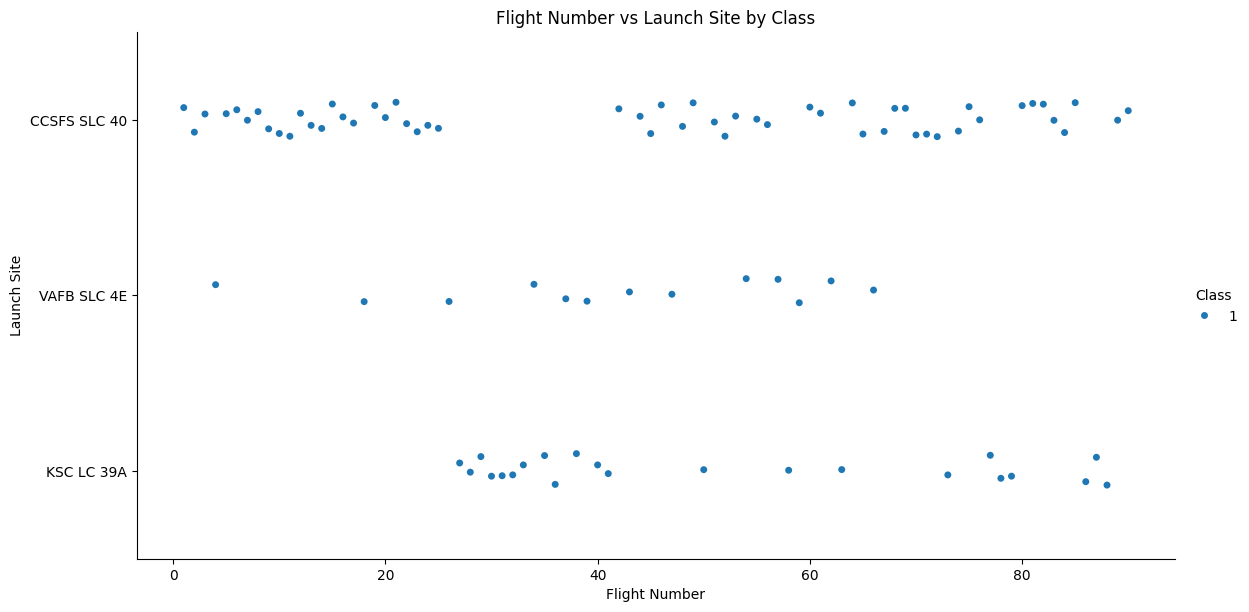

In [10]:
# Assuming your data is loaded into a DataFrame named df
# For example:
# df = pd.read_csv('your_data.csv')

sns.catplot(
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',   # Use exact column name
    data=df,
    kind='strip',  # You can change to 'swarm' or 'point' as needed
    height=6,
    aspect=2
)

plt.title('Flight Number vs Launch Site by Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

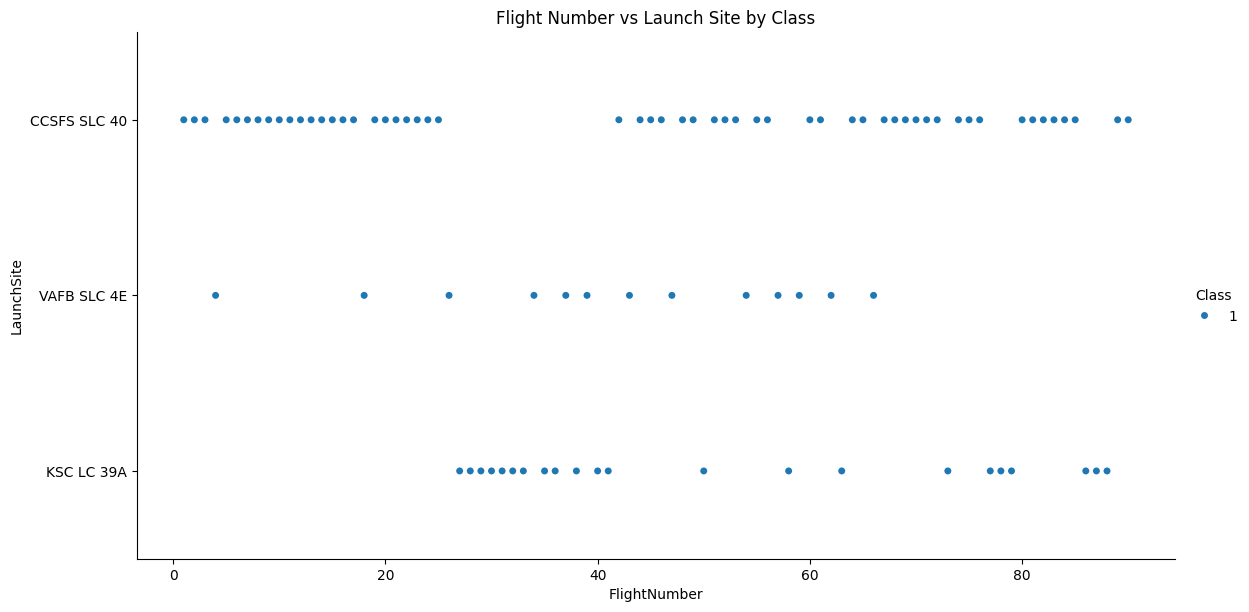

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame: make sure your dataframe is named df
# df = your DataFrame with columns 'FlightNumber', 'LaunchSite', and 'class'

sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='swarm', height=6, aspect=2)


plt.title('Flight Number vs Launch Site by Class')
plt.show()


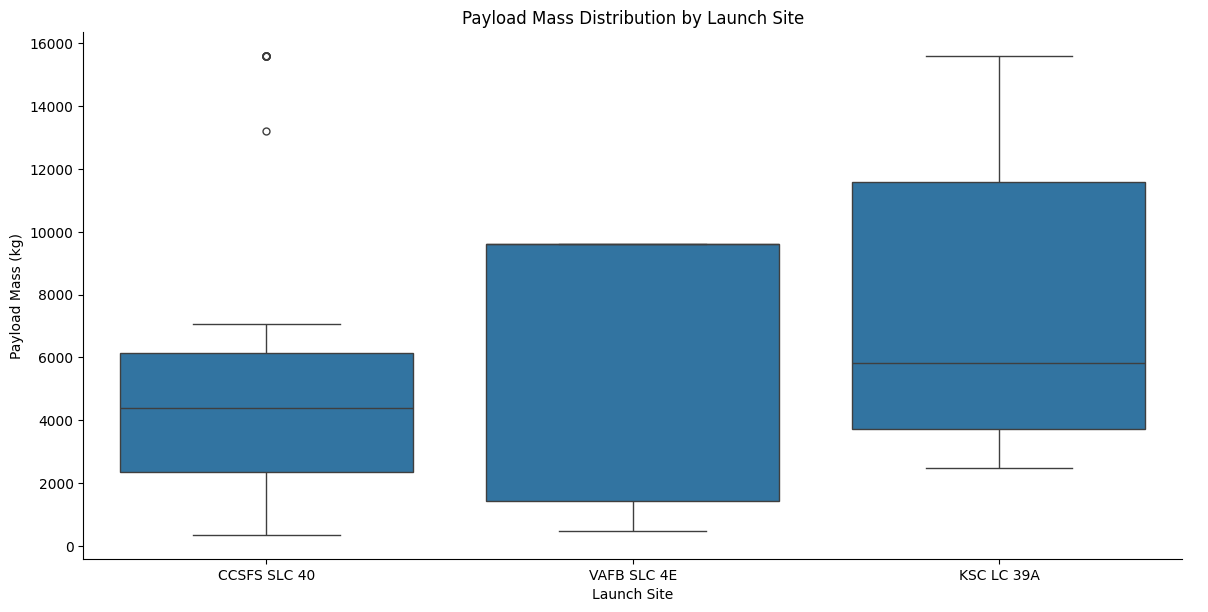

In [12]:
# Assuming your dataframe is named df

# Boxplot: shows distribution of PayloadMass for each LaunchSite
sns.catplot(
    x='LaunchSite',
    y='PayloadMass',
    data=df,
    kind='box',
    height=6,
    aspect=2
)

plt.title('Payload Mass Distribution by Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass (kg)')
plt.show()

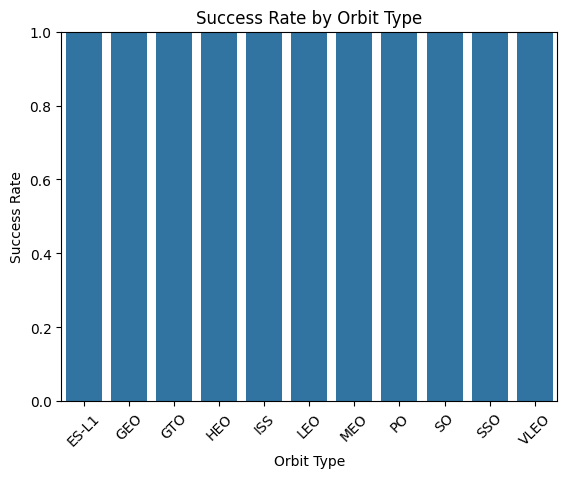

In [13]:
# Calculate success rate by orbit type
success_rate = df.groupby('Orbit').Class.mean().reset_index()
success_rate.rename(columns={'Class': 'Success_Rate'}, inplace=True)

# Plot bar chart
sns.barplot(x='Orbit', y='Success_Rate', data=success_rate)

plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # Success rate between 0 and 1
plt.xticks(rotation=45)
plt.show()

In [16]:
%load_ext sql
%sql sqlite:///my_data1.db



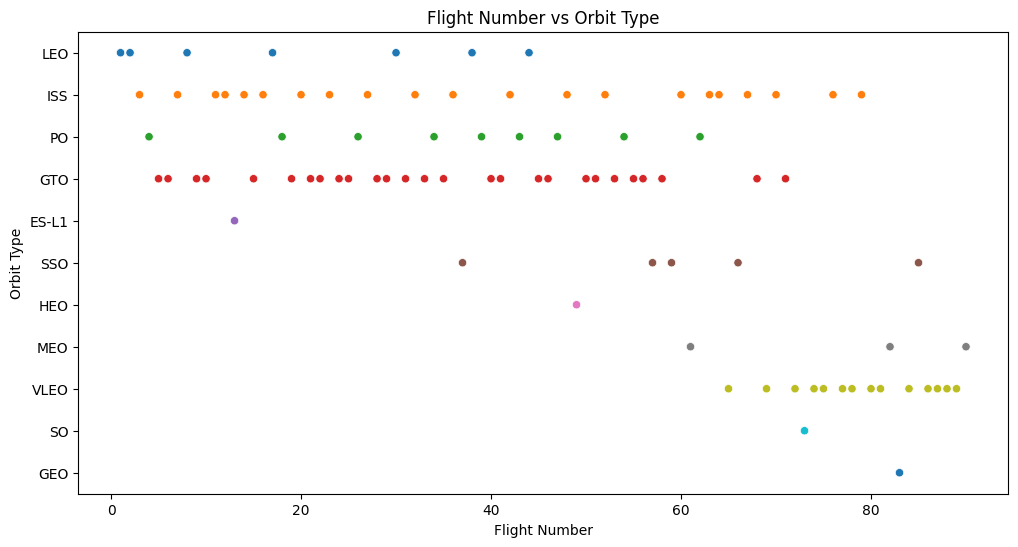

In [19]:
import sqlite3


conn = sqlite3.connect('my_data1.db')
query = "SELECT FlightNumber, Orbit FROM SPACEXTBL WHERE Orbit IS NOT NULL ORDER BY FlightNumber;"
df = pd.read_sql_query(query, conn)
conn.close()

# Now plot as before
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Orbit', palette='tab10', legend=False)
plt.title('Flight Number vs Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()

In [22]:
print(df.columns)


Index(['FlightNumber', 'Orbit'], dtype='object')


In [21]:
# Scatter plot of Payload Mass vs Orbit with hue by Class
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    data=df,
    palette='coolwarm',
    alpha=0.7
)


plt.title('Payload Mass vs Orbit Type Colored by Launch Outcome')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.legend(title='Class (Success=1, Fail=0)')
plt.show()

ValueError: Could not interpret value `PayloadMass` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>